<a href="https://colab.research.google.com/github/GiedriusDapsys/nvda-signals-project/blob/main/NVDA_Signal_Analysis_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📊 NVDA Signal Analysis Project
Backtesting, visualization, and forecasting based on trading signals for NVDA.

In [2]:

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv("/content/NVDA_kainos_su_signalais (1).csv")
df.columns = df.columns.str.strip()
df = df.rename(columns={'date': 'Date'})
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date').reset_index(drop=True)
df.head()


,Date,open,high,low,close,adjClose,volume,unadjustedVolume,change,changePercent,vwap,label,changeOverTime,signal
0,2019-01-02,3.27,3.46,3.25,3.41,3.38,508753600,508753600,0.13950,4.28,3.3475,"January 02, 19",0.0428,0.0
1,2019-01-03,3.34,3.38,3.19,3.20,3.17,705552000,705552000,-0.14500,-4.19,3.2775,"January 03, 19",-0.0419,0.0
2,2019-01-04,3.27,3.44,3.24,3.40,3.38,585620000,585620000,0.13125,3.98,3.3375,"January 04, 19",0.0398,0.0
3,2019-01-07,3.46,3.62,3.41,3.59,3.56,709160000,709160000,0.12250,3.76,3.5200,"January 07, 19",0.0376,0.0
4,2019-01-08,3.67,3.67,3.42,3.50,3.47,786017160,786017160,-0.17150,-4.63,3.5650,"January 08, 19",-0.0463,0.0


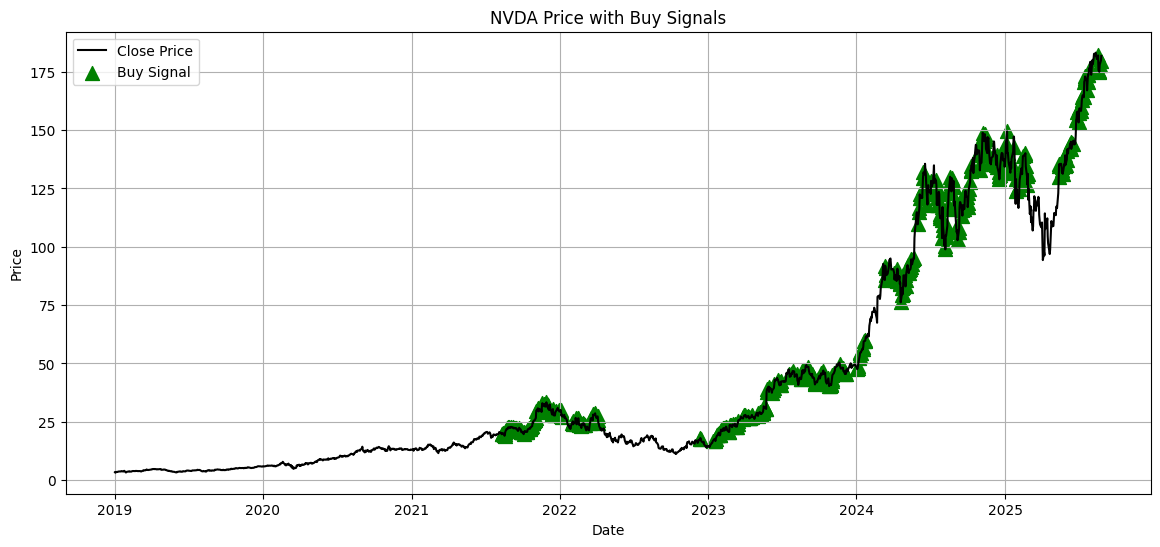

In [3]:

plt.figure(figsize=(14,6))
plt.plot(df['Date'], df['close'], label='Close Price', color='black')
buy_signals = df[df['signal'] == 1.0]
plt.scatter(buy_signals['Date'], buy_signals['close'], color='green', label='Buy Signal', marker='^', s=100)
plt.title('NVDA Price with Buy Signals')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()


In [4]:

total_signals = len(buy_signals)
avg_price = buy_signals['close'].mean()
start_price = df['close'].iloc[0]
end_price = df['close'].iloc[-1]
return_pct = (end_price - start_price) / start_price * 100

print(f'Total Buy Signals: {total_signals}')
print(f'Average Buy Price: ${avg_price:.2f}')
print(f'Total Return from {df["Date"].iloc[0].date()} to {df["Date"].iloc[-1].date()}: {return_pct:.2f}%')


Total Buy Signals: 547
Average Buy Price: $72.98
Total Return from 2019-01-02 to 2025-08-26: 5230.50%


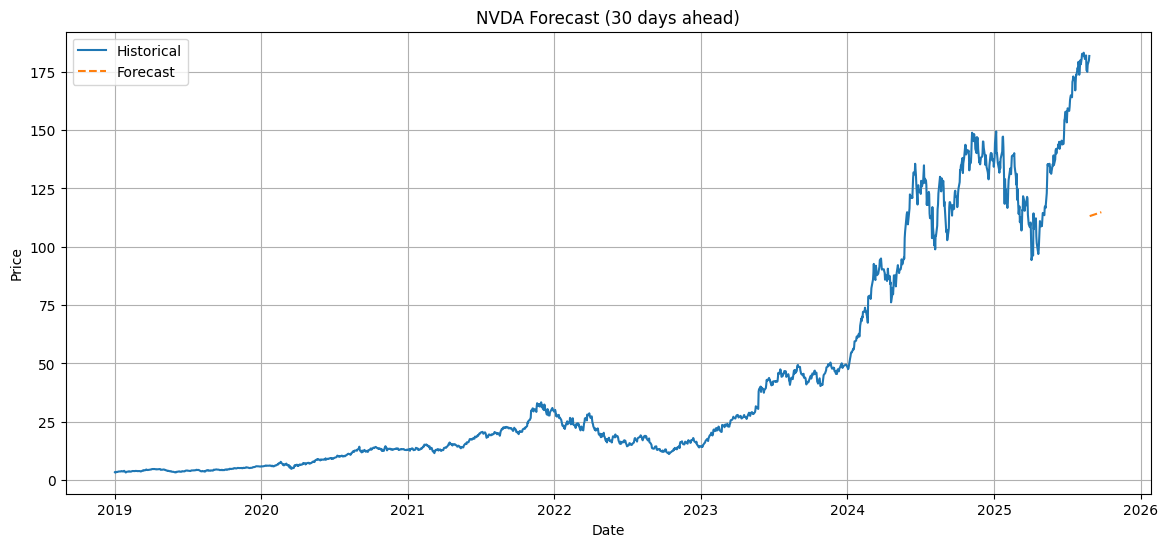

In [5]:

from sklearn.linear_model import LinearRegression

df['days'] = (df['Date'] - df['Date'].min()).dt.days
X = df[['days']].values
y = df['close'].values

model = LinearRegression().fit(X, y)

future_days = np.array(range(df['days'].max()+1, df['days'].max()+31)).reshape(-1,1)
future_prices = model.predict(future_days)

plt.figure(figsize=(14,6))
plt.plot(df['Date'], df['close'], label='Historical')
last_date = df['Date'].max()
future_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=30)
plt.plot(future_dates, future_prices, label='Forecast', linestyle='--')
plt.title('NVDA Forecast (30 days ahead)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be give

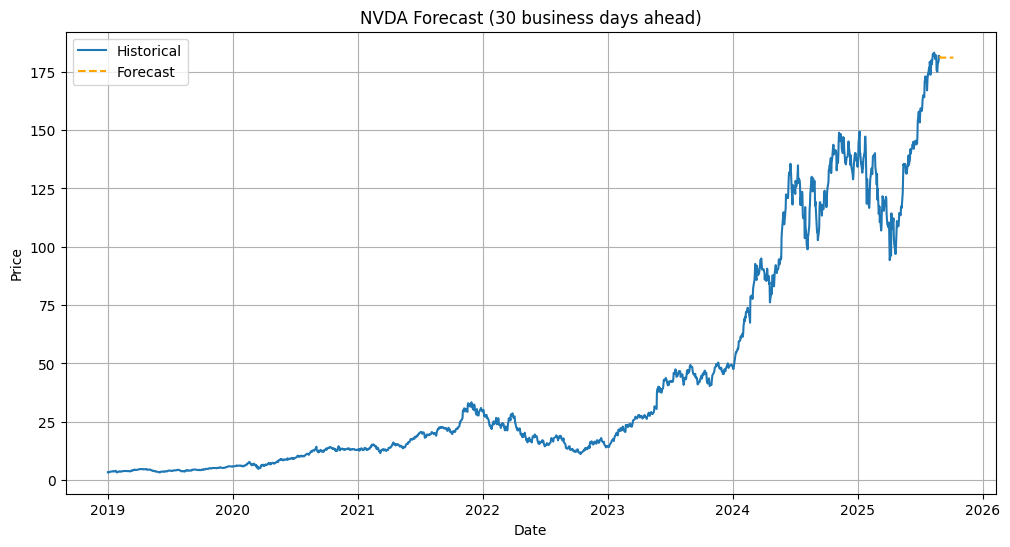

In [7]:
from statsmodels.tsa.arima.model import ARIMA
import pandas as pd
import matplotlib.pyplot as plt

# Užkraunam duomenis
df = pd.read_csv("NVDA_kainos_su_signalais (1).csv")
df["date"] = pd.to_datetime(df["date"])
df = df.sort_values("date")

# Modelio treniravimas
model = ARIMA(df["close"], order=(5, 1, 0))  # Pakeisk order jei reikia
model_fit = model.fit()

# 30 dienų prognozė
forecast_steps = 30
forecast = model_fit.forecast(steps=forecast_steps)

# Sukuriam forecast_df
last_date = df["date"].max()
forecast_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=forecast_steps, freq="B")
forecast_df = pd.DataFrame({"date": forecast_dates, "forecast": forecast.values})

# Vizualizacija
plt.figure(figsize=(12,6))
plt.plot(df["date"], df["close"], label="Historical")
plt.plot(forecast_df["date"], forecast_df["forecast"], label="Forecast", linestyle="--", color="orange")
plt.title("NVDA Forecast (30 business days ahead)")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.show()


In [8]:
forecast_df.to_csv("nvda_forecast.csv", index=False)

from google.colab import files
files.download("nvda_forecast.csv")



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [10]:
import pandas as pd

df = pd.read_csv("nvda_forecast.csv")
print(df.columns)


Index(['date', 'forecast'], dtype='object')


In [11]:
forecast = pd.read_csv("nvda_forecast.csv", parse_dates=["date"])  # jei stulpelis yra "date" mažosiomis


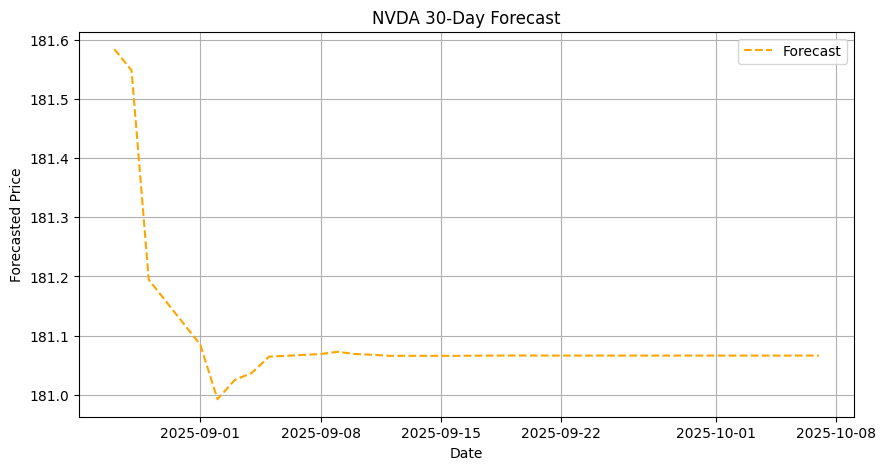

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(forecast["date"], forecast["forecast"], label="Forecast", linestyle='--', color='orange')
plt.xlabel("Date")
plt.ylabel("Forecasted Price")
plt.title("NVDA 30-Day Forecast")
plt.legend()
plt.grid(True)
plt.show()
